<img src="https://i.imgur.com/12tfKrD.png" alt="Alin">
</img>


# Demo RNN -- 張愛玲散文集AI二次創作

資料集: 張愛玲繁體中文小說 《傳奇》

爬蟲來源: [crawl_book](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)

程式碼參考: [Tensorflow](https://www.tensorflow.org/tutorials/text/text_generation)

本次資料集，著作權乃是張愛玲女士所擁有。**請勿將本次資料集散播、更改、用於非商業用途**。

> **資料集說明**

今年是張愛玲女士101年誕辰。張愛玲出生名門，曾就讀於香港大學和聖約翰大學，受過良好的中西教育。上海淪陷時期，陸續發表《沉香屑·第一爐香》、《傾城之戀》、《心經》、《金鎖記》等中、短篇小說，震動上海文壇。

這次訓練取張愛玲散文集《傳奇》作為訓練，《傳奇》收留五篇散文: 「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」。其中以「紅玫瑰與白玫瑰」最為膾炙人口。

> **訓練步驟**

深度學習在訓練模型上有以下幾個重要的步驟:
1. 讀入相關封包
2. 取得資料集 
3. 資料前處理
4. 建立模型
5. 制定訓練計畫
6. 評估模型
7. 做預測

> **本次模型介紹 RNN**

![](https://i.imgur.com/FaY50C8.png)


我們來看看維度，很多人會搞不懂RNN的維度:

一個Seq通過RNN後的維度

* Input: (Seq,${originDim}$)
* RNN Neuron: 2048
* Output: (Seq,2048) if (return_sequence == True) else (1,2048)
![](https://i.imgur.com/9SVl6JR.png)

![](https://i.imgur.com/z4ElFIr.png)

> **把生成問題變成分類問題**

![](https://i.imgur.com/TBHKuf6.png)


In [36]:
# ****************************************
# **請勿將本次資料集散播、用於非學術用途**
# ****************************************

# 執行即代表同意將會合法、合理使用資料集
# 太多人同時存取可能會報cannot retrieve file error
# 點擊you may still be able to access 下面那個連結再自行上傳檔案即可

!gdown --id 1gMpt0CdlPjr1cR3HwDqumeKaucrSYhhe --output "./Eileen_Legendary.txt"

# !wget -O Eileen_Legendary.txt "http://140.115.82.54/NN/Recurrent/Eileen_Legendary.txt"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gMpt0CdlPjr1cR3HwDqumeKaucrSYhhe
To: /content/Eileen_Legendary.txt
100% 818k/818k [00:00<00:00, 139MB/s]


## 1. 讀入Package

In [37]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

## 2. 取得資料集

In [38]:
# 作業之一就是試試看其他本小說

book = ""
with open("/content/史蒂芬．金《蕭山克的救贖》.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

book_length = len(book)
unique_words = set(book)
print(f"史蒂芬．金《蕭山克的救贖》共有{book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

史蒂芬．金《蕭山克的救贖》共有71242 字詞
包含了 2464 個獨一無二的字 (含標點符號)


《二○一六年四月一日版》
《好讀書櫃》經典版
第一部分
我相信我說過，監獄裡每個犯人都聲稱自己無辜。他們只是碰上了鐵石心腸的法官、無能的律師、警察的誣告，而成為受害者，再不然就是運氣實在太壞了。儘管他們手按《聖經》宣誓，但卻口是心非，像電視布道家那樣信口開河而已。大多數囚犯都不是什麼好人，無論對自己或對別人，都沒什麼好處，他們最大的不幸，就是被生到這世上來。
※※※
第一章
我猜美國每個州立監獄和聯邦監獄裡，都有像我這樣的一號人物，不論什麼東西，我都能為你弄到手。無論是高級香菸或大麻（如果你偏好此道的話），或弄瓶白蘭地來慶祝兒子或女兒高中畢業，總之差不多任何東西……我的意思是說，只要在合理範圍內，我是有求必應；可是很多情況不一定都合情合理的。
我剛滿二十歲就來到蕭山克監獄。在這個快樂小家庭中，我是少數肯痛痛快快承認自己幹了什麼的人。我犯了謀殺罪。我為大我三歲的太太投保了一筆數目龐大的壽險，然後在她父親送我們的結婚禮物──一輛雪佛蘭轎車的剎車上動了手腳。一切都正如我的計劃，只是沒料到她在半路上停下來載了鄰居太太和她的小兒子，他們正一起下城堡山進城去。結果煞車失靈，車速越來越快，衝過路邊


## 3. 資料前處理

文字前處理有一堆方法、作法:
* 切字
* 還原
* 清除特殊字符
* 清除不常見字符 (StopWord)


我這裡僅使用去除不常見的字(StopWord)

In [39]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [40]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 956


In [41]:
print(f"原本張愛玲散文集共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本張愛玲散文集共有 71242 字詞
去除不常出現的文字後
剩餘66689個字


In [42]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['\n', '《', '二', '一', '六', '年', '四', '月', '一', '日', '版', '》', '\n', '《', '好', '讀', '書', '櫃', '》', '經', '典', '版', '\n', '第', '一', '部', '分', '\n', '我', '相', '信', '我', '說', '過', '，', '監', '獄', '裡', '每', '個']
----------------------------------------
轉成index : 
{897, 773, 907, 780, 913, 792, 921, 668, 927, 800, 936, 942, 944, 820, 310, 951, 952, 955, 829, 65, 708, 454, 840, 848, 721, 722, 723, 867, 612, 875, 762}


In [43]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [44]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[944 721 848 951 820 921 840 780 951 722 454 723 944 721 907 310 762  65
 723 875 612], shape=(21,), dtype=int32)
['\n', '《', '二', '一', '六', '年', '四', '月', '一', '日', '版', '》', '\n', '《', '好', '讀', '書', '櫃', '》', '經', '典']
(21,)
tf.Tensor(
[454 944 773 951 708 800 944 952 668 792 952 936 927 955 867 913 897 829
 942 838 941], shape=(21,), dtype=int32)
['版', '\n', '第', '一', '部', '分', '\n', '我', '相', '信', '我', '說', '過', '，', '監', '獄', '裡', '每', '個', '犯', '人']


![](https://i.imgur.com/YMVMFEJ.png)


In [45]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

![](https://i.imgur.com/YoHWLkf.png)


In [46]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['\n', '《', '二', '一', '六', '年', '四', '月', '一', '日', '版', '》', '\n', '《', '好', '讀', '書', '櫃', '》', '經']
Target: ['《', '二', '一', '六', '年', '四', '月', '一', '日', '版', '》', '\n', '《', '好', '讀', '書', '櫃', '》', '經', '典']
--------------------------------------------------
Input : [944 721 848 951 820 921 840 780 951 722 454 723 944 721 907 310 762  65
 723 875]
Target: [721 848 951 820 921 840 780 951 722 454 723 944 721 907 310 762  65 723
 875 612]


In [47]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

## 4. 建立模型

![](https://i.imgur.com/TBHKuf6.png)

In [48]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 512)         489472    
                                                                 
 lstm_2 (LSTM)               (None, None, 4096)        75513856  
                                                                 
 lstm_3 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense_1 (Dense)             (None, None, 956)         1958844   
                                                                 
Total params: 128,302,012
Trainable params: 128,302,012
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 956)
Model target shape : (64, 20)


In [50]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
「所有的地質學都是在究壓力。」
當然，還
----------------------------------------
輸入尚未訓練的model後獲得：

專抗扔扔扔扔扔扔雕雕男雕雕雕岩岩造造造造


## 5. 制定訓練計畫並訓練

* [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) V.S. [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy)

```python=
# categorical_crossentropy
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

# sparse_categorical_crossentropy
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

```


In [51]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [52]:
EPOCHS = 20
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)

Epoch 1/20
49/49 [==============================] - 17s 307ms/step - loss: 6.2627
Epoch 2/20
49/49 [==============================] - 16s 319ms/step - loss: 5.7757
Epoch 3/20
49/49 [==============================] - 16s 327ms/step - loss: 5.4563
Epoch 4/20
49/49 [==============================] - 16s 322ms/step - loss: 5.1574
Epoch 5/20
49/49 [==============================] - 16s 317ms/step - loss: 4.8707
Epoch 6/20
49/49 [==============================] - 16s 315ms/step - loss: 4.5819
Epoch 7/20
49/49 [==============================] - 16s 314ms/step - loss: 4.2975
Epoch 8/20
49/49 [==============================] - 16s 322ms/step - loss: 3.9819
Epoch 9/20
49/49 [==============================] - 16s 325ms/step - loss: 3.6037
Epoch 10/20
49/49 [==============================] - 16s 321ms/step - loss: 3.1115
Epoch 11/20
49/49 [==============================] - 16s 317ms/step - loss: 2.4892
Epoch 12/20
49/49 [==============================] - 16s 318ms/step - loss: 1.7962
Epoch 13/20
4

## 6. 衡量模型

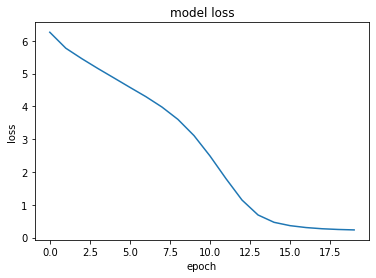

In [53]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [54]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
「所有的地質學都是在究壓力。」
當然，還
----------------------------------------
輸入進訓練後的model後獲得：

我有的地質學都是在究壓力。」
當然，還有


## 7. 做預測

![](https://i.imgur.com/YsOj6Mw.png)

在實際生成文字時，我們會想要增加一些隨機性。比如”天天出去” 不加入隨機 “天天天天” 如果我們全部輸出的字都是取softmax最大可能性，則一個訓練完美的model會把整本書給輸出出來。但是我們要的是，希望電腦在最大可能性的幾個字中隨機挑選一個字出來。

tf.random.categorical 會根據softmax機率後隨機挑選字，但是我們不希望因為模型很爛導致不合理的字被選中，因此我們會除上一個temperature來增加可能字的比重。

EX: "天天出去" 預測下一個字
1. 玩 : 0.3 
2. 天 : 0.1 
3. 浪 : 0.4 

"天"有的機率被印出，我們不希望。所以我們可以在每一個機率除上一個temperature(0.01)
1. 玩 : 30 
2. 天 : 10 
3. 浪 : 40 
原本"浪"跟"天"差0.3，除temperature後差30



In [55]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

In [61]:
init_seq = "諾頓"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,500)

諾頓做髒事，也繼續管理圖書館，所以從外表看看在他走了。
「我說，」我說，「我是安迪，你知道。
「他們說到這兒子，我真的到了。」
「那是你的見子，」他說，「你是跟你的事法，」他說，「雷德，」他說，「你是怎麼辦法的。」
「我想我只知道。」
「我知道，」安迪說，「不過你看起來也不像特別會別。別人，我可以把太太情況，但是我的朋友吉米幫我弄的，他是在我上訴被被關的那個部分，大門已厭有三十個，」他的「「」。
「我們打開《聖經》第二十三篇一起讀吧」的聲音。
「你是怎麼辦到的？」安迪問，「你為什麼？」
「我想你不知道。」
「我知道，」安迪說，「我們打定一定都不留過。我問他是怎麼出事的。他們到這些經經的監獄，而且在我的時候，你過得很好。
你的朋友
我從來不曾殺過那個傢伙，他在「大年一樣，都會放給你的日子。」
「你是說，你先射殺了昆丁？」
「不管，」他說，「真是一報還一報。而打，在他們發現的表情都下，安迪長步的。「我們打開了，但是……」
「我已經幫了你一個忙，」諾頓平靜道，「但我知道這兒至少。」
「我知道，」安迪說，「不過你看起來也不像特別會別。別人，我可以把太太情況，但是我的朋友吉米幫我弄的，他是在我上訴被

In [ ]:
# 不要執行這一個block
import time
while True:
  time.sleep(5)
  pass

## 作業2.1 (30%)

使用[爬蟲程式](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)來取得一個新的文本資料集，或是不管你從哪裡取得的資料集也可以(不要再張愛玲了，不限中英文)。然後丟入這個模型來看看AI生成文字的成果，將**結果**與**你的心得**(不是機器產生的心得)，貼上pdf。

請隨意修改本colab的模型與參數來達到更好的結果。

資料集越有趣越好，比如你可以去爬PTT文章來製作廢文產生器。去爬Dcard製作幻想文產生器。

In [62]:
init_seq = "諾頓"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,500)

諾頓做髒事，也繼續管理圖書館，所以從外表看看看了他會走了，因為他在監獄的醫務室傷。
這些東西並非免費的，有些東西代價不。但我不確定這樣是否。我想他也很喜歡。」
「我想你也是受你的。」
「那麼你聽到他告訴我，他每次都聽得這麼事，我總告訴他：他一直奮靜，沒有人會費掉，但是他們走過的最冷開，否則是死紀的，但是我知道那天晚上，當的暗天色逐漸變得黑，黑得像六點人的腦袋中，不過再上面是我的名字，是安迪整點時間，我才想到他是個東西。
「星，雷德，我知道，這是在監獄裡過了大半子的結果。在牢裡，我就有五個月，那個老家的人仍然變得，我的眼睛，我就會把它斷。你可以把子插下子的全。
現在我要告訴你一九五〇年五月中發生的事情。當時我們已經了一個叫鎮的名字，大部分我們的大概只是個小鏡子。
「你知道，」他說，「你是說，你會想起你的。」
「這麼你聽到他告訴我，他的老婆總是對他們為「話的，或許是……」
「我知道，」安迪說，「不過你看起來也不像特別會別。別人，我可以把太太情況，但是我的朋友吉米幫我弄的，他是在我上訴被被關的那個部分，大門已厭壓了，他們不能隨有五百元，此後十年中，圖書館每年都收得他的。
我記了，當年我的朋友吉米